In [7]:
# Reminder! Rerun brianmap analysis.

% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat 
mpl.rcParams['svg.fonttype'] = 'none'

fd = loadmat('gradient_data/brainmap/FunctionalDecoding.mat')
SpecificTasks = loadmat('gradient_data/brainmap/SpecificTasks.mat')
AllBD = SpecificTasks['AllBD']
AllPC = SpecificTasks['AllPC']

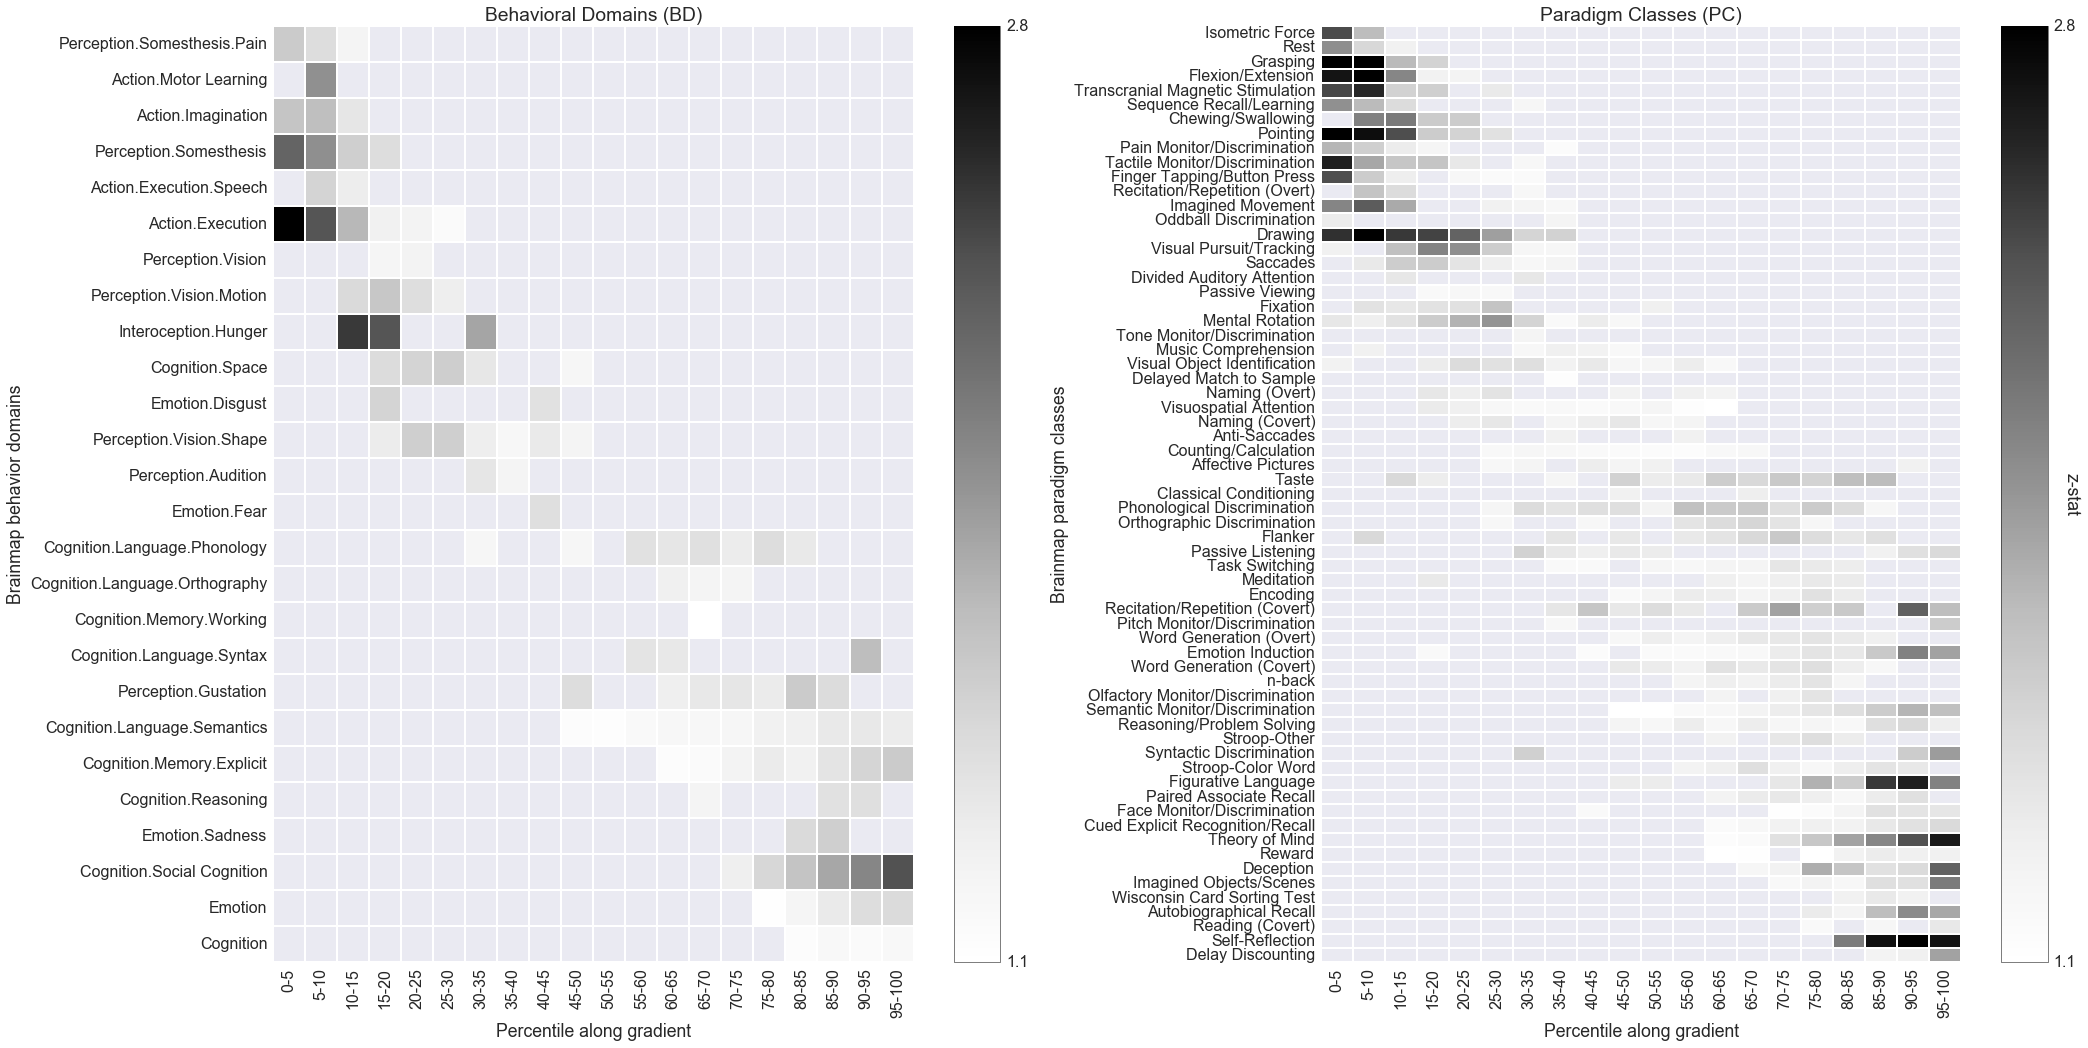

In [9]:
thr = 2.3; # Z threshold
min_study_num = 24

sns.set(context="paper", font="sans-serif", font_scale=2)
h, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(30, 15))

# Behavioral Domains:
bd = np.array([fd['BDprofile_LR'] * [fd['BDprofile_Z'] > thr]]*1).squeeze();
notzero = np.intersect1d(np.where([np.sum(bd,axis=0) > 0])[1], 
                         np.where([np.array(AllBD['Available']).squeeze().T > min_study_num])[1])
bd = bd[:,notzero].T
i,j = np.where(bd)
m = np.zeros(len(bd))
for k in range(len(bd)):
    m[k] = np.mean(j[i == k])
ind = np.argsort(m)

tmp = [str(i) for i in fd['BDnames'][0]]
BDnames = [i.replace("[u'", "") for i in tmp]
BDnames = [i.replace("']", "") for i in BDnames]
data = pd.DataFrame(bd[ind,:])
tot = 5
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in xrange(0,len(data.columns))]
data.columns = newnames
data.index = np.array(BDnames)[notzero[ind]]
thr = np.min(np.min(data[data != 0]))
vmax = data.max().max()
cax1 = sns.heatmap(data, linewidths=1, square=False, cmap='Greys', robust=False, 
            ax=ax1, vmin=thr, vmax=vmax, mask=data==0)
ax1.set_xlabel('Percentile along gradient')
ax1.set_ylabel('Brainmap behavior domains')
ax1.set_title('Behavioral Domains (BD)')
cbar1 = cax1.collections[0].colorbar
cbar1.set_ticks(ticks=[thr,vmax])
cbar1.set_ticklabels(ticklabels=['{:.1f}'.format(thr),'{:.1f}'.format(vmax)])
cbar1.outline.set_edgecolor('black')
cbar1.outline.set_linewidth(0.5)

# Paradigm Classes
pc = np.array([fd['PCprofile_LR'] * [fd['PCprofile_Z'] > thr]]*1).squeeze();
notzero = np.intersect1d(np.where([np.sum(pc,axis=0) > 0])[1], 
                         np.where([np.array(AllPC['Available']).squeeze().T > min_study_num])[1])
pc = pc[:,notzero].T
i,j = np.where(pc)
m = np.zeros(len(pc))
for k in range(len(pc)):
    m[k] = np.mean(j[i == k])
ind = np.argsort(m)
data2 = pd.DataFrame(pc[ind,:])
data2.columns = newnames
tmp = [str(i) for i in fd['PCnames'][0]]
PCnames = [i.replace("[u'", "") for i in tmp]
PCnames = [i.replace("']", "") for i in PCnames]
data2.index = np.array(PCnames)[notzero[ind]]
thr = np.min(np.min(data2[data2 != 0]))
vmax = data.max().max()
cax2 = sns.heatmap(data2, linewidths=1, square=False, cmap='Greys', robust=False, 
            ax=ax2, vmin=thr, vmax=vmax, mask=data2==0)
ax2.set_xlabel('Percentile along gradient')
ax2.set_ylabel('Brainmap paradigm classes')
ax2.set_title('Paradigm Classes (PC)')
cbar2 = cax2.collections[0].colorbar
cbar2.set_label('z-stat', rotation=270)
cbar2.set_ticks(ticks=[thr,vmax])
cbar2.set_ticklabels(ticklabels=['{:.1f}'.format(thr),'{:.1f}'.format(vmax)])
cbar2.outline.set_edgecolor('black')
cbar2.outline.set_linewidth(0.5)

mpl.rcParams.update({'font.size': 22})
h.tight_layout()
plt.draw()
h.savefig('gradient_data/figures/fig.supp.brainmap.svg', format='svg')